In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes.instrument_drivers.nplab_drivers.Keithley_2182a import Keithley_2182a
from qcodes.instrument_drivers.nplab_drivers.Keithley_6221 import Keithley_6221
import time

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
%matplotlib notebook

In [2]:
k6 = Keithley_6221('k6', 'GPIB::12::INSTR')
k2 = Keithley_2182a('k2', 'GPIB::7::INSTR')

Connected to: KEITHLEY INSTRUMENTS INC. 6221 (serial:4307474, firmware:D03  /700x) in 0.16s
Connected to: KEITHLEY INSTRUMENTS INC. 2182A (serial:4319846, firmware:C06  /A02) in 0.05s


# Tests from - to +, without using delta differential conductance mode on a 10 $\Omega$ resistor at room temperature

First with -100 to +100 $\mu A$, step = 1 $\mu A$, delay = 1 s

In [88]:
k6.current(-1e-4)
k6.output(1)

In [8]:
station = qc.Station(k6, k2)

In [29]:
k6.current.step = 5e-5
k6.current.inter_delay = 0.2

In [89]:
loop1 = qc.Loop(k6.current.sweep(-1e-4, 1e-4, 1e-6), delay=1).each(k2.measure)
data = loop1.get_data_set(name='lasttestsweep100uAnodelta')
plot1 = qc.QtPlot(data.k2_measure)
loop1.with_bg_task(plot1.update, plot1.save).run()
k6.output(0)

Started at 2018-01-23 10:45:02
DataSet:
   location = 'data/2018-01-23/#010_lasttestsweep100uAnodelta_10-45-02'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | k6_current_set | current      | (201,)
   Measured | k2_measure     | measure      | (201,)
Finished at 2018-01-23 10:48:32


<IPython.core.display.Javascript object>


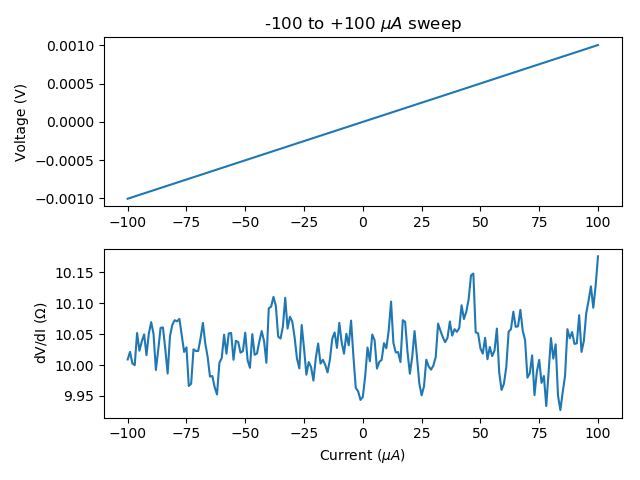

In [90]:
I = np.array(data.k6_current_set)*10**6
dVdI = np.gradient(np.array(data.k2_measure))/np.gradient(np.array(data.k6_current_set))
dat = np.column_stack((I, dVdI))
np.savetxt('dvdi100uAnodelta', dat)
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.array(data.k6_current_set)*10**6, data.k2_measure)
plt.title('-100 to +100 $\mu A$ sweep')
plt.ylabel('Voltage (V)')
plt.subplot(2,1,2)
plt.plot(I, dVdI)
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.tight_layout()

In [93]:
print('dV/dI Mean: {:.6f}'.format(np.mean(dVdI)))
print('dV/dI Standard deviation: {:.6e}'.format(np.std(dVdI)))

dV/dI Mean: 10.030448
dV/dI Standard deviation: 4.171146e-02


Then with with -10 to +10 $\mu A$, step = 0.1 $\mu A$, delay = 1 s

In [96]:
k6.current(-10e-6)
k6.output(1)
k6.current.step = 5e-6

In [100]:
loop2 = qc.Loop(k6.current.sweep(-10e-6, 10e-6, 0.1e-6), delay=1).each(k2.measure)
data2 = loop2.get_data_set(name='testsweep10uAnodelta')
plot2 = qc.QtPlot(data2.k2_measure)
loop2.with_bg_task(plot2.update, plot2.save).run()
k6.output(0)

Started at 2018-01-23 12:59:36
DataSet:
   location = 'data/2018-01-23/#011_testsweep10uAnodelta_12-59-36'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | k6_current_set | current      | (201,)
   Measured | k2_measure     | measure      | (201,)
Finished at 2018-01-23 13:03:06


<IPython.core.display.Javascript object>


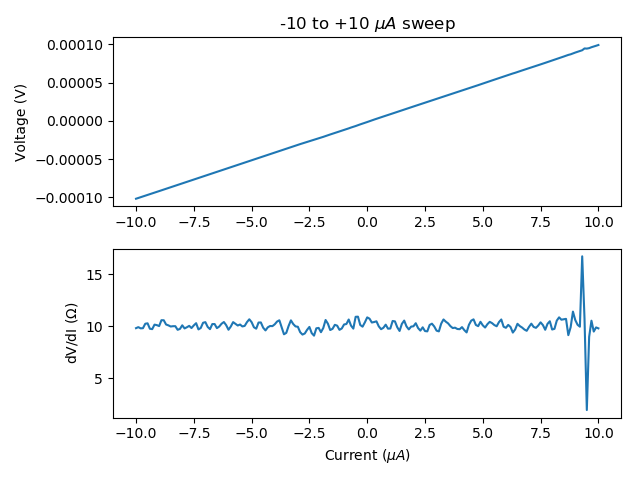

In [112]:
I2 = np.array(data2.k6_current_set)*10**6
dVdI2 = np.gradient(np.array(data2.k2_measure))/np.gradient(np.array(data2.k6_current_set))
dat2 = np.column_stack((I2, dVdI2))
np.savetxt('dvdi10uAnodelta', dat2)
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.array(data2.k6_current_set)*10**6, data2.k2_measure)
plt.title('-10 to +10 $\mu A$ sweep')
plt.ylabel('Voltage (V)')
plt.subplot(2,1,2)
plt.plot(I2, dVdI2)
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.tight_layout()

In [103]:
print('dV/dI Mean: {:.6f}'.format(np.mean(dVdI2)))
print('dV/dI Standard deviation: {:.6e}'.format(np.std(dVdI2)))
print('Note: had some jiggling of cords at current ~9')

dV/dI Mean: 10.034545
dV/dI Standard deviation: 8.307273e-01
Note: had some jiggling of cords at current ~9


Then with -100 nA to +100 nA, step 1 nA, delay 1 s

In [104]:
k6.current(-100e-9)
k6.output(1)
k6.current.step = 50e-9

In [105]:
loop3 = qc.Loop(k6.current.sweep(-100e-9, 100e-9, 1e-9), delay=1).each(k2.measure)
data3 = loop3.get_data_set(name='testsweep100nAnodelta')
plot3 = qc.QtPlot(data3.k2_measure)
loop3.with_bg_task(plot3.update, plot3.save).run()
k6.output(0)

Started at 2018-01-23 13:14:02
DataSet:
   location = 'data/2018-01-23/#012_testsweep100nAnodelta_13-14-01'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | k6_current_set | current      | (201,)
   Measured | k2_measure     | measure      | (201,)
Finished at 2018-01-23 13:17:31


<IPython.core.display.Javascript object>


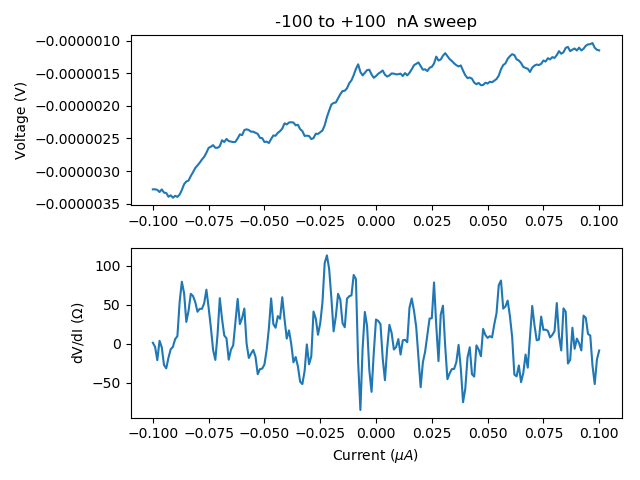

dV/dI Mean: 10.576124
dV/dI Standard deviation: 3.590004e+01


In [113]:
I3 = np.array(data3.k6_current_set)*10**6
dVdI3 = np.gradient(np.array(data3.k2_measure))/np.gradient(np.array(data3.k6_current_set))
dat3 = np.column_stack((I3, dVdI3))
np.savetxt('dvdi100nAnodelta', dat3)
plt.figure()
plt.subplot(2,1,1)
plt.plot(np.array(data3.k6_current_set)*10**6, data3.k2_measure)
plt.title('-100 to +100  nA sweep')
plt.ylabel('Voltage (V)')
plt.subplot(2,1,2)
plt.plot(I3, dVdI3)
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.tight_layout()
print('dV/dI Mean: {:.6f}'.format(np.mean(dVdI3)))
print('dV/dI Standard deviation: {:.6e}'.format(np.std(dVdI3)))

In [107]:
k6.close()
k2.close()